In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-review/The Dark Knight 2008.csv
/kaggle/input/movie-review/Star Wars Episode VIII - The Last Jedi 2017.csv
/kaggle/input/movie-review/The Lord of the Rings The Fellowship of the Ring 2001.csv
/kaggle/input/movie-review/Joker 2019.csv
/kaggle/input/movie-review/Star Wars Episode VII - The Force Awakens 2015.csv


# Predicting the rating of a movie using machine learning algorithm.

In this notebook, we're going to go through an example machine learning project with the goal of predicting the rating of a movie.

## 1.Problem definition

 Movie rating prediction based on review using machine learning & deep learning model

## 2.Data

This data set is downloaded from IMDb movie reviews dataset.

Link: https://ieee-dataport.org/open-access/imdb-movie-reviews-dataset

### Primary Target:
Predict rating of one movie’s rating based on the review

### Further Target:
Predict rating of different movies.



## 3.Steps
Step1: download the data and there will be a lot of movie’s csv file where we need to extract review and rating.

Step2: after extracting feature we need to apply world embedding process to create train and test data.
Word embedding process:

* 1.https://www.turing.com/kb/guide-on-word-embeddings-in-nlp
* 2.https://www.geeksforgeeks.org/word-embeddings-in-nlp/
* 3.https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa
* 4.https://machinelearningmastery.com/what-are-word-embeddings/

## 4.Modeling

Design models using machine learning algorithms:

    1. Use ML algorithms like SVM
    2. Use RNN model like LSTM

## 5. Evaluating

## 6. Improving

Imporving machine learning model using:

* `Grid Search CV`

 

In [2]:
# Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline


## Import data

In [44]:
df = pd.read_csv('/kaggle/input/movie-review/Joker 2019.csv')

In [45]:
df.head(3)

,username,rating,helpful,total,date,title,review
0,JF500,10,7092,8206,10 September 2019,As a viewer that actually went to TIFF and wi...,I was a person that saw all the hype and claim...
1,MihaVrhunc,10,3512,4261,3 October 2019,Outstanding movie with a haunting performance...,"Every once in a while a movie comes, that trul..."
2,lesterarnoldpinto,10,2905,3641,7 October 2019,Only certain people can relate\n,This is a movie that only those who have felt ...


In [277]:
df.shape

(10046, 7)

In [46]:
df = setup_data(df)
df.shape

(9935, 2)

In [7]:
def setup_data(df):
    '''
    Preprocess some basic works
    '''
    # Drop every column except the specified column
    df = df[['rating', 'review']]
    # Drop Null rows
    df = df[~(df == 'Null').any(axis=1)]
    
    
    return df

In [47]:
df.head(2)

,rating,review
0,10,I was a person that saw all the hype and claim...
1,10,"Every once in a while a movie comes, that trul..."


In [48]:
df.rating.value_counts()

10    5720
9     1440
8      670
1      522
7      448
6      362
5      275
2      181
4      168
3      149
Name: rating, dtype: int64

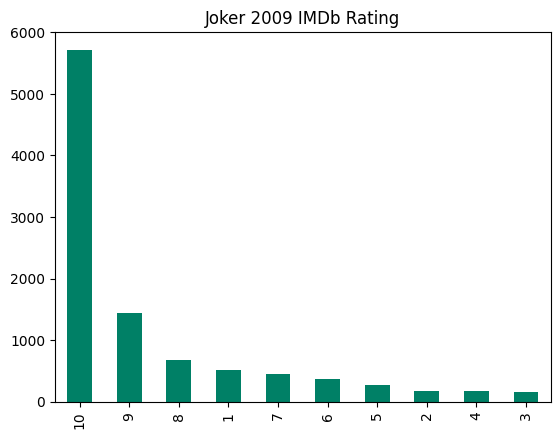

In [281]:
df.rating.value_counts().plot(kind='bar', cmap='summer', title='Joker 2009 IMDb Rating');

In [215]:
li = []
for rev in df.review:
    li.append(len(rev))
    if len(rev) == 50:
        print(rev, end='\n ended\n')

It's a fantastic movie and deserve the Oscar prize
 ended
Only saving grace is the genius of the lead actor.
 ended
Amazingly good lead performance by Joaquin Phoenix
 ended
The best best joker movie ever
WOW and the Saddest
 ended
Beautifully lit. But my god was it boring as hell.
 ended
It is good but no one can do it like Heath Ledger.
 ended
Make a man and take everything from him... Joker 💕
 ended
Perfect representation of mental health spiralling
 ended
Joker needs an Oscar, absolutely brilliant movie!!
 ended
"I just hope my death is worth more than my life."
 ended
Waaaawwwwooooohhhhjjjjjjjjjjjjjjll this is amazing
 ended
Great performances and extremely strong stroy line
 ended
This is fantastic film. You must go to the cinema!
 ended
This movie is amazing despit what the critics say.
 ended
Boring, overrated & a stupid movie. Waste of time.
 ended
Only movie I've spent money to see more than once.
 ended
The best acting performance of his career, surely.
 ended
Worth watching

In [229]:
li.sort(reverse=True)
li[:10]

[2021, 2020, 2018, 2018, 2017, 2017, 2016, 2012, 2011, 2011]

In [9]:
def remove_big_review(rev):
    '''
    Removes big review.
    '''
    if len(rev)>2023:
        rev = 'Null'
    return rev

In [210]:
df.shape

(10046, 7)

In [49]:
df.review = df.review.apply(remove_big_review)

In [11]:
df.shape

(9935, 2)

In [12]:
def clean_text(test):
    '''
    Clean's up the unnecessary thiings of a text by replacing them with proper symbols.
    '''
    test = test.replace('<br/>', '')
    test = test.replace('--', ' ')
    test = test.replace("'", '')
    test = test.replace('"','')
    test = test.replace('.', '')
    test = test.replace(',', '')
    test = test.replace('?', '')
    test = test.replace('!', '')
    test = test.replace('\n', '')
    test = test.lower()
    return test

In [13]:
df.review[2]

'This is a movie that only those who have felt alone and isolated can truly relate to it. You understand the motive and you feel sorry for the character. A lot of people will see this movie and think that it encourages violence. But truly, this movie should encourage each and every one of us to become a better person, treat everyone with respect and make each other feel like they belong in this world, instead of making them feel isolated.'

In [28]:
def stop_words(doc):
    '''
    Removes Words that are not that necessary for our model.
    '''
    # Process the document
    doc = nlp(doc)

    # List of stop words in spaCy
    stop_words = spacy.lang.en.stop_words.STOP_WORDS

    # Filter out stop words from the document
    filtered_words = [token.text for token in doc if not token.is_stop]

    # Join the filtered words back into a string
    filtered_document = " ".join(filtered_words)
    
    return filtered_document


In [36]:
stop_words(df.review[6])

'disney subverted star wars lame boring childish films aimed selling toys preteens sure mcdonalds poisoning people hawking star wars toys disneynot film adults'

In [51]:
# Clean the text removing unnecessary things
df['review'] = df['review'].apply(clean_text)

In [52]:
df.head()

,rating,review
0,10,i was a person that saw all the hype and claim...
1,10,every once in a while a movie comes that truly...
2,10,this is a movie that only those who have felt ...
3,10,truly a masterpiece the best hollywood film of...
4,10,joaquin phoenix gives a tour de force performa...


In [40]:
df['review'] = df['review'].apply(stop_words)

In [222]:
df.shape

(9353, 7)

In [53]:
df.review[9000]

'while it would have benefited from about 15 minutes of additional judicious editing and has a tonal misstep at a critical moment in the final act this is still a courageous must watch film for anyone that found the trailer compellingif youre wanting an action film youll be disappointedif youre a big dceu fan youll likely be disappointedthat said this dark plodding disturbing character study fully delivers on the grisly promise laid out in the trailerphoenix is guaranteed an oscar nomination and deservedly so easily the most daring dc comic adaptation to datedefinitely not a crowd pleaser or easy watch and a better fit for fans of lars von trier yorgos lanthimos and ari aster than those of zach snyder and the dceuif the above gives you pause youve been warned if it actually makes you more piqued then this entirely singular entry in the genre will deliver in spades'

In [54]:
import spacy

# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_lg")


# Function to convert text to vectors using spaCy
def text_to_vectors(text):
    '''
    Converts text to vector
    '''
    doc = nlp(text)
    return doc.vector

In [55]:
df['vector'] = df['review'].apply(text_to_vectors)

In [56]:
df = df[['rating', 'vector']]

In [57]:
df.head(2)

,rating,vector
0,10,"[-1.8976084, 0.81403136, -1.9676262, -0.658363..."
1,10,"[-0.67236304, 1.5694288, -1.9216864, 0.2154285..."


In [21]:
df.dtypes

rating    object
vector    object
dtype: object

In [288]:
df.vector[1]

array([-6.72363043e-01,  1.56942880e+00, -1.92168641e+00,  2.15428501e-01,
        3.24867845e+00,  3.75334442e-01,  1.50033188e+00,  4.26460552e+00,
       -6.65242910e-01, -2.40589336e-01,  5.32425213e+00,  1.20022666e+00,
       -3.57962346e+00,  1.03239477e+00,  4.62030977e-01,  9.82604802e-01,
        2.09749532e+00,  6.12225771e-01, -9.36267018e-01, -1.00267291e+00,
        1.46787393e+00,  9.13052082e-01, -1.56796467e+00, -5.80643833e-01,
       -5.33271968e-01, -2.44904065e+00, -3.09685755e+00, -1.57209694e+00,
       -6.83725834e-01,  1.65692782e+00,  1.78310975e-01,  1.50020614e-01,
        7.20212162e-01, -1.40632200e+00, -1.51286960e+00,  5.87278724e-01,
       -9.13040340e-01,  1.91303289e+00,  2.73011589e+00,  1.24521837e-01,
       -1.85456321e-01,  9.65468236e-04,  5.42247593e-01, -5.94582498e-01,
       -4.17857081e-01,  1.40220976e+00, -2.22080991e-01, -2.55930948e+00,
       -3.02619427e-01,  1.95174921e+00, -3.70621681e-01,  9.02845204e-01,
        5.68413496e-01, -

In [234]:
df.dtypes

rating    object
vector    object
dtype: object

In [64]:
df.rating = df.rating.astype(int)

In [90]:
# df.vector = df.vector.astype(list)

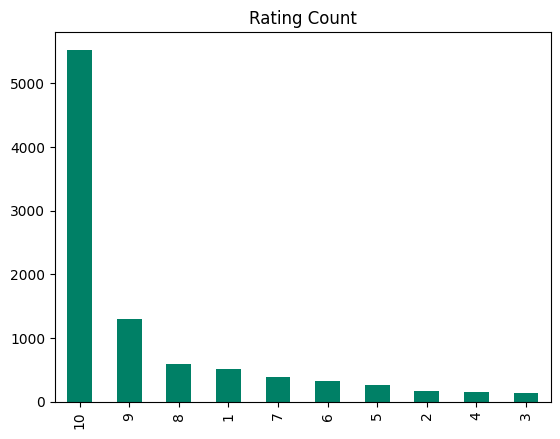

In [235]:
df.rating.value_counts().plot(kind='bar', cmap='summer', title='Rating Count');

In [121]:
df.drop(['review'], axis=1, inplace=True)

In [237]:
df.head(2)

,rating,vector
0,10,"[-1.8976084, 0.81403136, -1.9676262, -0.658363..."
1,10,"[-0.67236304, 1.5694288, -1.9216864, 0.2154285..."


In [238]:
# Save the DataFrame as a CSV file
df.to_csv('/kaggle/working/modified_joker.csv', index=False)

In [255]:
df = pd.read_csv('/kaggle/working/modified_joker.csv')

In [58]:
df.head()

,rating,vector
0,10,"[-1.8976084, 0.81403136, -1.9676262, -0.658363..."
1,10,"[-0.67236304, 1.5694288, -1.9216864, 0.2154285..."
2,10,"[-1.7805097, 1.9253515, -3.3554823, -1.191348,..."
3,10,"[-1.8557566, 1.2580421, -2.549472, -0.7036581,..."
4,10,"[-1.762923, 0.9215117, -2.0996163, 0.26532263,..."


In [24]:
df.vector[2]

array([-1.7805097 ,  1.9253515 , -3.3554823 , -1.191348  ,  3.177855  ,
        0.947769  ,  1.1602398 ,  4.1754594 , -1.7378085 , -0.28509095,
        8.28139   ,  2.0799162 , -4.300748  ,  1.4787799 ,  1.9194722 ,
        0.12303174,  1.9639199 , -1.830846  , -1.5030327 , -1.7666509 ,
        1.3072995 , -0.0592246 , -1.3840419 , -1.9006182 , -0.13185088,
       -2.0961082 , -2.7153423 ,  0.27679107, -1.5490029 ,  1.7169538 ,
        2.4146078 , -1.2375593 , -0.37092203, -3.0865238 , -1.8604892 ,
       -0.17943335, -0.2078614 ,  1.5306414 ,  3.5501475 ,  1.8163426 ,
       -0.8614693 ,  1.4292259 ,  0.63292825, -0.05593517, -1.5230545 ,
        2.0461748 ,  0.7876879 , -3.401828  , -0.84907156,  2.9580758 ,
       -0.3117156 ,  1.6693723 ,  1.1638895 , -5.8847237 , -2.0211024 ,
       -0.0895086 ,  0.33423972,  1.7766771 ,  1.329774  , -0.14941716,
        1.2134784 , -0.11548219, -0.5343407 , -1.9195102 ,  1.8233759 ,
        2.7157829 , -4.0847707 , -4.758356  ,  1.2189595 ,  2.20

## fewer the levels

In [75]:
level_df = pd.DataFrame({'level': [1, 2, 3, 4],
                         'range': [[10, 9], [8,7], [5,6], [1,2,3,4]]})

In [76]:
level_df

,level,range
0,1,"[10, 9]"
1,2,"[8, 7]"
2,3,"[5, 6]"
3,4,"[1, 2, 3, 4]"


In [61]:
def level(x):
    '''
    Changes predicted levels to human brain level.
    '''
    if x in [10, 9]:
        x = 1
    elif x in [7, 8]:
        x = 2
    elif x in [5, 6]:
        x = 3
    elif x in [1, 2, 3, 4]:
        x = 4
    return x
# def level(x):
#     if x in [10, 9, 8, 7, 6]:
#         x = 0
#     elif x in [1, 2,3,4, 5]:
#         x = 1
#     return x

In [65]:
df.rating = df.rating.apply(level)

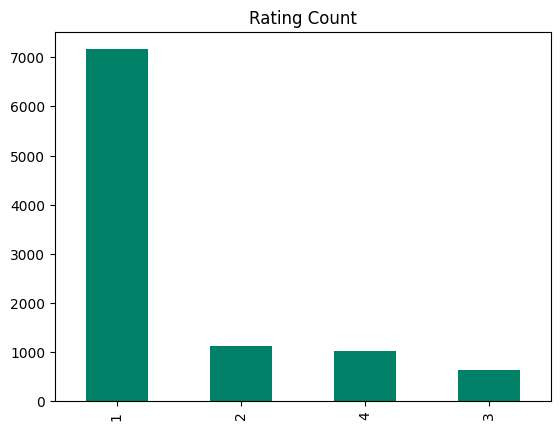

In [66]:
df.rating.value_counts().plot(kind='bar', cmap='summer', title='Rating Count');

In [67]:
df.head(2)

,rating,vector
0,1,"[-1.8976084, 0.81403136, -1.9676262, -0.658363..."
1,1,"[-0.67236304, 1.5694288, -1.9216864, 0.2154285..."


In [31]:
df.dtypes

rating     int64
vector    object
dtype: object

In [32]:
df.shape

(9935, 2)

In [293]:
# X[0]

## Seperate the feature and target variable

In [68]:
# Set data 
X = list(df['vector'])
y = list(df.rating.astype(int))

In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

In [70]:
# Split the data into training and testing sets

np.random.seed(71)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [296]:
len(X_train), len(X_test), len(y_train), len(y_test)

(7948, 1987, 7948, 1987)

## 1. RandomForestClassifier

In [71]:
# Load model
rfc = RandomForestClassifier()

### Fit the data to the model


In [72]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
rfc.score(X_test, y_test)

0.7030699547055863

In [74]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%", )

Accuracy: 70.31%


In [314]:
level_df

,level,range
0,1,"[10, 9]"
1,2,"[8, 7]"
2,3,"[5, 6]"
3,4,"[1, 2, 3, 4]"


In [40]:
y_pred[:10]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [41]:
y_test[:10]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [77]:
def value_count(y_pred):
    # Get unique values and their frequencies
    unique_values, value_counts = np.unique(y_pred, return_counts=True)

    # Print the unique values and their frequencies
    for value, count in zip(unique_values, value_counts):
        print(f'{value}: {count}')
value_count(y_pred), value_count(y_test)

1: 1978
2: 1
4: 8
1: 1392
2: 239
3: 124
4: 232


(None, None)

## Confusion Matrix

In [79]:
from sklearn.metrics import confusion_matrix

# Make our confusion matrixx more visual with Seaborn's heatmap()
import seaborn as sb

con_mat = confusion_matrix(y_test, y_pred)
con_mat


array([[1391,    0,    0,    1],
       [ 238,    0,    0,    1],
       [ 123,    1,    0,    0],
       [ 226,    0,    0,    6]])

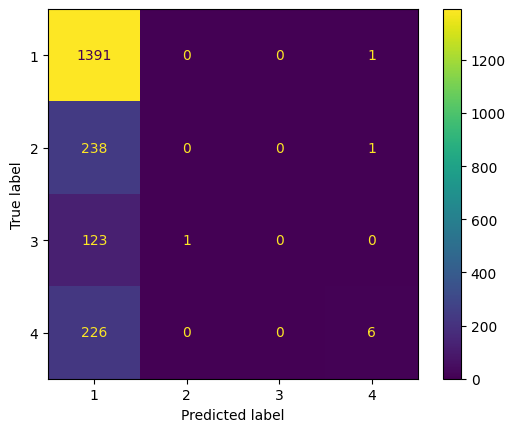

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


from sklearn import metrics
con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[1,2,3,4])
con_mat_plot.plot()
plt.show()

## More accurate predict

## 2.SupportVectorMachine

In [306]:
# Import SVC
from sklearn.svm import SVC

# Create and train the SVM classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_preds = svm_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_preds)

print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 70.21


In [331]:
y_preds[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [327]:
value_count(y_preds)

1: 1984
4: 3


In [329]:
value_count(y_test)

1: 1392
2: 239
3: 124
4: 232


## 3.LogisticRegression

In [83]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression


# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
preds = logreg.predict(X_test)

#Calculate accuracy score
accuracy = accuracy_score(y_test, preds)

print(f"Accuracy: {accuracy*100:.2f}", )

Accuracy: 73.83


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [308]:
preds[:10]

array([1, 1, 2, 1, 1, 1, 1, 1, 3, 1])

In [309]:
y_test[:10]

[1, 2, 1, 1, 1, 1, 1, 1, 3, 1]

In [84]:
# Make predictions with probablity
y_prb = logreg.predict_proba(X_test)
y_prb[:10]

array([[0.94473108, 0.04797425, 0.00366764, 0.00362703],
       [0.59311314, 0.17660631, 0.13690875, 0.0933718 ],
       [0.3607018 , 0.42400864, 0.16624441, 0.04904515],
       [0.98068863, 0.01278011, 0.00425047, 0.00228078],
       [0.70336461, 0.19867126, 0.03286555, 0.06509858],
       [0.91292824, 0.02413624, 0.03549163, 0.02744389],
       [0.97008485, 0.02393979, 0.00495097, 0.00102439],
       [0.95494992, 0.03821812, 0.00473729, 0.00209467],
       [0.25963926, 0.13743267, 0.54908259, 0.05384548],
       [0.98699413, 0.0097514 , 0.00144925, 0.00180522]])

In [333]:
value_count(preds)

1: 1690
2: 62
3: 54
4: 181


In [334]:
value_count(y_test)

1: 1392
2: 239
3: 124
4: 232


## Confusion Matrix

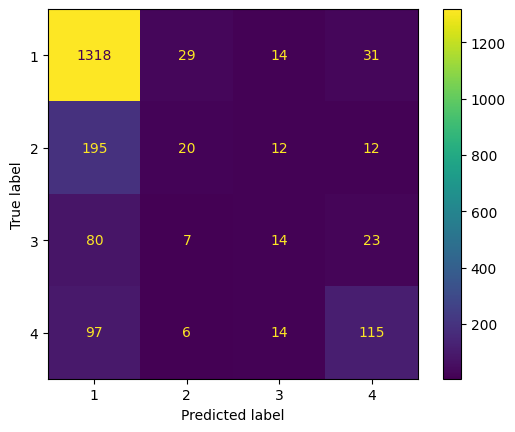

In [87]:
con_mat = confusion_matrix(y_test, preds)
con_mat
con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[1,2,3,4])
con_mat_plot.plot()
plt.show()

In [360]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# # Evaluate the classifier
# print(f'''
#         Accuracy: {accuracy_score(y_test, preds)*100:.2f}%\n
#         Precision: {precision_score(y_test, preds)*100:.2f}%\n
#         Recall: {recall_score(y_test, preds)*100:.2f}%\n
#         F1: {f1_score(y_test, preds)*100:.2f}
#       '''  
#       )

In [95]:
def mean_error(actual, predicted):
    # Calculate the absolute difference between corresponding elements
    differences = [abs(a - p) for a, p in zip(actual, predicted)]
    
    # Compute the sum of all the absolute differences
    error_sum = sum(differences)
    
    # Divide the sum by the total number of elements to obtain the mean error
    mean_error = error_sum / len(actual)
    
    return mean_error

# Example usage
actual_values = [1, 2, 3, 4, 5]
predicted_values = [1.5, 2.2, 2.8, 4.1, 5.2]

error = mean_error(actual_values, predicted_values)
print(error)  # Output: 0.66


0.24000000000000005


In [115]:
def mean_error_2(actual, predicted):
    # Calculate the absolute difference between corresponding elements
    differences = [abs(a - p) for a, p in zip(actual, predicted) if abs(a-p)>1.5]
    
    return differences

In [ ]:
mean_error_2()

# Plot the Comparision

In [335]:
model_score = {
    'name': ['RFC', 'SVM', 'LogisticRegression'],
    'score': [70.36, 70.21, 73.83]
}
# Convert the dictionary to a DataFrame
scores = pd.DataFrame(model_score)

# Print the DataFrame
scores

,name,score
0,RFC,70.36
1,SVM,70.21
2,LogisticRegression,73.83


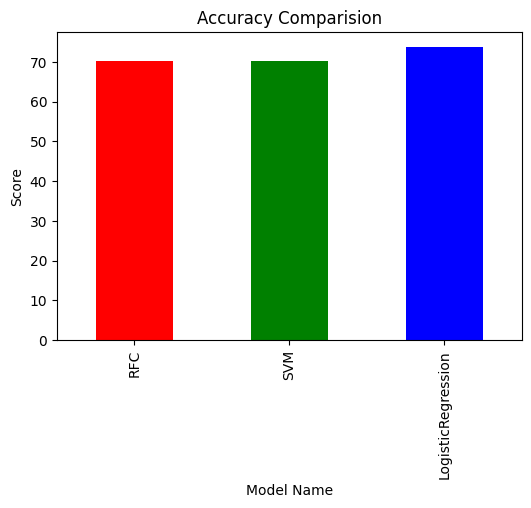

In [336]:
# Create a figure with a custom figsize

# Plot the DataFrame
scores.plot(x='name', y='score', kind='bar', color=['red', 'green', 'blue', 'cyan'], figsize=(6, 4), legend=False)
# plt.legend(False)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.title('Accuracy Comparision')

# Display the plot
plt.show();

## Evaluating Model

In [89]:
from sklearn.model_selection import cross_val_score
# Cross val score of RFC
# cross_val_score(rfc, X, y, cv=5)

In [344]:
# Cross val score of Logistic Regression
ans = cross_val_score(logreg, X, y, cv=10)
print(f'Highest accuracy: {max(ans)}.')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Highest accuracy: 0.7673716012084593.


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [398]:
ans

array([0.75050302, 0.74647887, 0.74346076, 0.75352113, 0.74849095,
       0.74018127, 0.7673716 , 0.73816717, 0.74521652, 0.74622356])

In [371]:
print(f'Highest accuracy: {max(ans)*100:.0f}%.')

Highest accuracy: 77%.


In [90]:
# Cross val score of Logistic Regression
ans = cross_val_score(logreg, X, y, cv=15)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [104]:
ans

array([0.74208145, 0.76470588, 0.74057315, 0.74358974, 0.74509804,
       0.75226586, 0.74622356, 0.74169184, 0.74924471, 0.77643505,
       0.74471299, 0.74018127, 0.75075529, 0.74018127, 0.74320242])

In [91]:
print(f'Highest accuracy: {max(ans)*100:.0f}%.')

Highest accuracy: 78%.


## Confusion metrics

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In essence, giving you an idea where the model is getting confused.



## Imporving a ML model

First predictions = baseline predictions First model = baseline model

From a data perspective:

* Could we collect more data?
* Could we improve our data? (maybe gain more feature of a sample)

From a model perspective:

* Is there a better model we could use? (see the map)
* Could we improve the current model? (change the hyperparameters)

Three ways to adjust hyperparameters:

* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

## At first save my base model

In [361]:
from joblib import dump

model = logreg

# Save the model to the Kaggle directory
filename = '/kaggle/working/model.joblib'
dump(model, filename)

['/kaggle/working/model.joblib']

In [92]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [93]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [100]:
# Define parameter grid and their possible values
param_grid = {
    'solver': ['saga', 'sag', 'newton-cg']
}

In [101]:
param_grid

{'solver': ['saga', 'sag', 'newton-cg']}

In [102]:
model = LogisticRegression()
# Setup RandomizedSearchCV
gs_logreg = GridSearchCV(estimator = model,
                            param_grid=param_grid,
                            cv=15,
                            verbose=2)



In [103]:
gs_logreg.fit(X_train,y_train)

Fitting 15 folds for each of 3 candidates, totalling 45 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................................solver=saga; total time=   6.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................................solver=saga; total time=   6.8s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................................solver=saga; total time=   6.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................................solver=saga; total time=   6.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................................solver=saga; total time=   6.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................................solver=saga; total time=   6.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................................solver=saga; total time=   6.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................................solver=saga; total time=   6.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................................solver=saga; total time=   6.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................................solver=saga; total time=   6.8s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................................solver=saga; total time=   6.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................................solver=saga; total time=   6.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................................solver=saga; total time=   6.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................................solver=saga; total time=   6.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................................solver=saga; total time=   6.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........................................solver=sag; total time=   5.8s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........................................solver=sag; total time=   5.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........................................solver=sag; total time=   5.8s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........................................solver=sag; total time=   5.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........................................solver=sag; total time=   5.8s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........................................solver=sag; total time=   5.8s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........................................solver=sag; total time=   5.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........................................solver=sag; total time=   5.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........................................solver=sag; total time=   5.8s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........................................solver=sag; total time=   5.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........................................solver=sag; total time=   5.8s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........................................solver=sag; total time=   5.8s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........................................solver=sag; total time=   5.8s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........................................solver=sag; total time=   5.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........................................solver=sag; total time=   5.7s
[CV] END ...................................solver=newton-cg; total time=  10.6s
[CV] END ...................................solver=newton-cg; total time=  10.4s
[CV] END ...................................solver=newton-cg; total time=  11.1s
[CV] END ...................................solver=newton-cg; total time=  12.2s
[CV] END ...................................solver=newton-cg; total time=  11.8s
[CV] END ...................................solver=newton-cg; total time=  11.9s
[CV] END ...................................solver=newton-cg; total time=  11.0s
[CV] END ...................................solver=newton-cg; total time=  11.2s
[CV] END ...................................solver=newton-cg; total time=  10.9s
[CV] END ...................................solver=newton-cg; total time=  10.8s
[CV] END ...................................solver=newton-cg; total time=  12.1s
[CV] END ...................

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'solver': ['saga', 'sag', 'newton-cg']}, verbose=2)

<!-- Kaj pray shesh -->

## best parameters

In [105]:
best_params = gs_logreg.best_params_
best_params

{'solver': 'sag'}

In [106]:
best_score = gs_logreg.best_score_
print(f'Best Score is {best_score}')

Best Score is 0.7522640320528825


In [121]:
best_model = gs_logreg.best_estimator_

In [123]:
best_model.score(X_test, y_test)

0.7403120281831908

In [108]:
preds = gs_logreg.predict(X_test)

In [124]:
preds[:10], y_test[:10]

(array([1, 1, 2, 1, 1, 1, 1, 1, 3, 1]), [1, 2, 1, 1, 1, 1, 1, 1, 3, 1])

In [110]:
value_count(preds) ,value_count(y_test)

1: 1714
2: 56
3: 47
4: 170
1: 1392
2: 239
3: 124
4: 232


(None, None)

In [117]:
con_mat

array([[1326,   24,    9,   33],
       [ 200,   22,    9,    8],
       [  82,    6,   15,   21],
       [ 106,    4,   14,  108]])

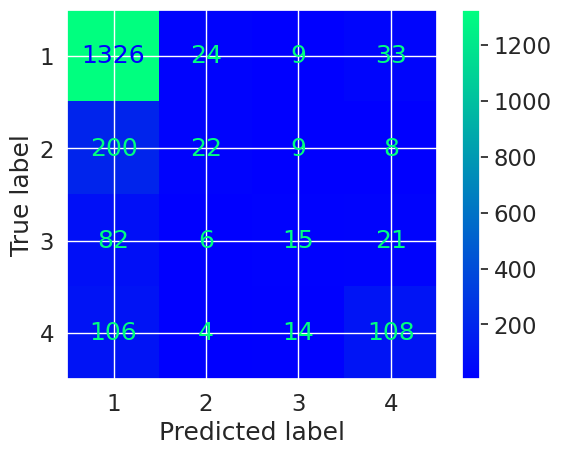

In [140]:
import matplotlib.pyplot as plt
con_mat = confusion_matrix(y_test, preds)
con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[1,2,3,4])
con_mat_plot.plot(cmap='winter')
# Set tick positions and labels

plt.show()

In [378]:
print('done')

done


## Test On custom data

In [142]:
logreg.score(X_test, y_test)

0.7382989431303473

In [143]:
best_model.score(X_test, y_test)

0.7403120281831908

In [163]:
rev_list = []
cus_test = []

In [173]:
rev_list.append(rev2)

In [157]:
def cust_review(rev):
    '''
    Returns analyted data to a list named cus_test
    '''
    rev = clean_text(rev)
    rev = text_to_vectors(rev)
    cus_test.append(rev)

In [158]:
rev = 'This is a very Good Movie. I loved it. The story was very beautiful, the acting was superb. My Whole family loved it. Direction was best. So overall It was the best movie so far.'

In [168]:
rev2 = 'This is the worst movie i have seen so far. Very bad acting. very bad graphics. Worst direction. Total waste of time. My family hated it. The worst movie i have seen in my life.'

In [204]:
rev_list.append('''The movie I watched with a rating of 5/10 left me with mixed feelings. While it had some promising elements, it fell short in several areas. The plot had potential but lacked originality and failed to fully engage me. The characters were decently portrayed, but their development felt shallow and left me wanting more. The pacing was inconsistent, with moments of excitement followed by dull stretches. The cinematography and visual effects were adequate but didn't stand out. Overall, the movie had moments that held my interest, but it failed to leave a lasting impact or evoke strong emotions. It was an average experience that didn't quite live up to my expectations.''')

In [200]:
rev_list[7]

'From start to finish, it captivated me with its compelling narrative, well-crafted characters, and masterful storytelling. The plot was rich and thought-provoking, weaving together various themes and emotions flawlessly. The performances were exceptional, breathing life into the characters and drawing me deeper into their world. The cinematography was stunning, with breathtaking visuals that enhanced the overall experience. The movie struck the perfect balance between entertainment and depth, leaving me thoroughly satisfied. It was a true cinematic gem that I would highly recommend to anyone seeking a memorable and impactful movie-going experience.'

In [206]:
cust_review(rev_list[8])

In [205]:
cust_true = [1, 4, 1, 2, 3, 4, 4, 2, 3]

In [207]:
logreg.predict(cus_test)

array([1, 4, 1, 1, 1, 2, 4, 1, 2])

## It is actually working on custom dataset

In [208]:
best_model.predict(cus_test)

array([1, 4, 1, 1, 1, 2, 4, 1, 2])

In [209]:
cust_true

[1, 4, 1, 2, 3, 4, 4, 2, 3]

In [211]:
c_prob

array([[9.88959449e-01, 8.45820373e-03, 1.06771439e-03, 1.51463297e-03],
       [7.46783049e-02, 2.42524442e-03, 3.10047556e-03, 9.19795975e-01],
       [9.07837577e-01, 8.77132774e-02, 3.52095720e-03, 9.28188320e-04],
       [6.91511850e-01, 2.93933099e-01, 9.50715920e-03, 5.04789157e-03],
       [6.52368760e-01, 2.18287160e-01, 1.15055408e-01, 1.42886711e-02],
       [1.92699542e-01, 3.05980936e-01, 2.82414680e-01, 2.18904842e-01],
       [2.23593783e-02, 2.25844331e-02, 7.78676828e-02, 8.77188506e-01],
       [9.74319743e-01, 2.40492927e-02, 1.23835128e-03, 3.92613327e-04],
       [1.84014227e-01, 3.68832332e-01, 3.62175712e-01, 8.49777295e-02]])

In [210]:
c_prob = best_model.predict_proba(cus_test)

## Raff